# Seaborn Tasks

## Tasks 1

Import the pandas_tasks.csv

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
task_df = pd.read_csv("pandas_tasks.csv")
task_df.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


#### Prepare Data

In [188]:
location_df = task_df[['Latitude', 'Longitude','Q2', 'Q3']]
location_df.head()

,Latitude,Longitude,Q2,Q3
0,-4.460442,29.811396,2,3
1,-6.176438,39.244871,1,1
2,-6.825702,37.652798,2,4
3,-3.372049,35.808307,1,1
4,-7.179645,31.039095,1,1


> Rename Q2 & Q3 to thier encoding : 'gender' & 'marital_status'

In [190]:
location_df = location_df.rename(columns={'Q2':'gender', 'Q3':'marital_status'})
location_df.head()

,Latitude,Longitude,gender,marital_status
0,-4.460442,29.811396,2,3
1,-6.176438,39.244871,1,1
2,-6.825702,37.652798,2,4
3,-3.372049,35.808307,1,1
4,-7.179645,31.039095,1,1


> change the values of 1 and 2 in gender to male and female respectibely using lambda

> Do the same for marital status


In [192]:
def gender_rename(x):
    if x == 1:
        x='male'
    elif x==2:
        x='female'
    return x

In [193]:
location_df.gender = location_df.gender.apply(lambda x: gender_rename(x))
location_df.head()

,Latitude,Longitude,gender,marital_status
0,-4.460442,29.811396,female,3
1,-6.176438,39.244871,male,1
2,-6.825702,37.652798,female,4
3,-3.372049,35.808307,male,1
4,-7.179645,31.039095,male,1


In [194]:
def marital_rename(x):
    if x == 1:
        x='married'
    elif x==2:
        x='divorced'
    elif x==3:
        x='widowed'
    elif x==4:
        x='single'
    return x

In [195]:
location_df.marital_status = location_df.marital_status.apply(lambda x: marital_rename(x))
location_df.marital_status.head()

0    widowed
1    married
2     single
3    married
4    married
Name: marital_status, dtype: object

#### Question 1. Make a scatter plot of the Longitude and Latitude columns

In [196]:
x=location_df.Latitude.values.tolist()
y = location_df.Longitude.values.tolist()

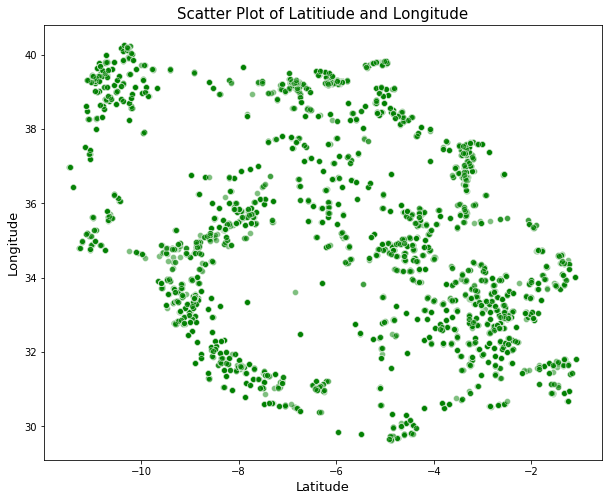

In [202]:
plt.subplots(figsize=(10,8))
plt.title('Scatter Plot of Latitiude and Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Longitude', fontsize=13)
ax = sns.scatterplot(x, y, alpha=.5, color='g')
plt.show()

#### Question 2. Make a scatter plot of the Longitude and Latitude columns. This time, plot with 'hue' = Q2 and compare it over Q3

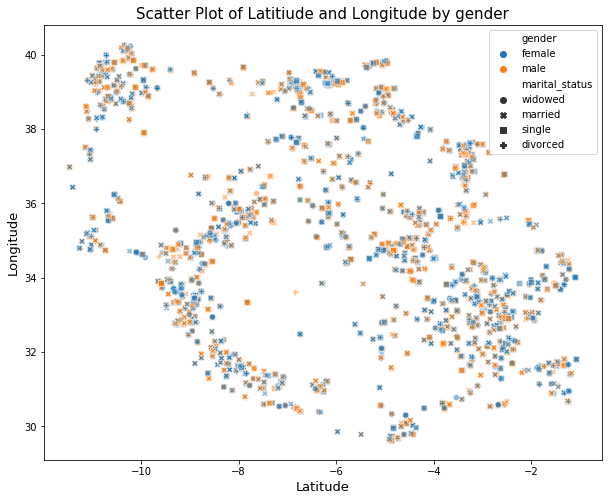

In [209]:
plt.subplots(figsize=(10,8))
plt.title('Scatter Plot of Latitiude and Longitude by gender', fontsize=15)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Longitude', fontsize=13)
ax =sns.scatterplot(x='Latitude', y='Longitude', alpha=.5, color='g',
               # palette=[ "#008000", "#FF0000"],
                    hue='gender', data=location_df, style='marital_status')
legend_labels, _= ax.get_legend_handles_labels()
# plt.legend()
plt.show()

#### Question 3. Make a boxplot of Longiture and Q2

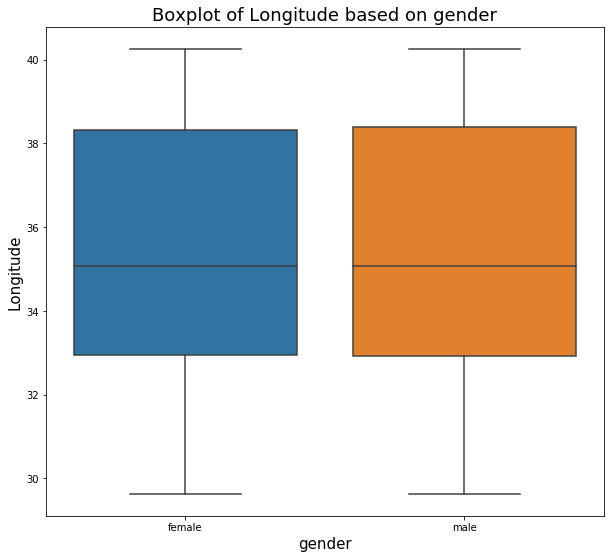

In [187]:
plt.subplots(figsize=(10,9))
plt.title('Boxplot of Longitude based on gender', fontsize=18)
plt.xlabel('gender',fontsize=15)
plt.ylabel('Longitude',fontsize=15)
ax =sns.boxplot(x='gender', y='Longitude', data=location_df)
legend_labels, _= ax.get_legend_handles_labels()
plt.show()

#### Question 4. Make a count plot of all the cateegorical variables in the dataset.

In [211]:
# sns.countplot(data=task_df)